<a href="https://colab.research.google.com/github/Oluwills/Health-Care-Data-Sample/blob/main/Health_Care_Sample_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv'
df = pd.read_csv(url)
HealthCare = pd.read_csv(url)
HealthCare.head(12)

,month,share interest,unemployment index,share price
0,1,2.00,5.9,1075
1,2,2.00,5.7,1130
2,3,2.25,5.6,1167
3,4,2.25,5.5,1159
4,5,2.25,5.5,1195
5,6,2.50,5.5,1234
6,7,2.50,5.6,1254
7,8,2.50,5.4,1256
8,9,2.50,5.3,1293
9,10,2.50,5.3,1357


In [ ]:
missing_values = df.isnull().sum()

print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
month                 0
share interest        0
unemployment index    0
share price           0
dtype: int64


   month  share interest  unemployment index  share price
0      1            2.00                 5.9         1075
1      2            2.00                 5.7         1130
2      3            2.25                 5.6         1167
3      4            2.25                 5.5         1159
4      5            2.25                 5.5         1195


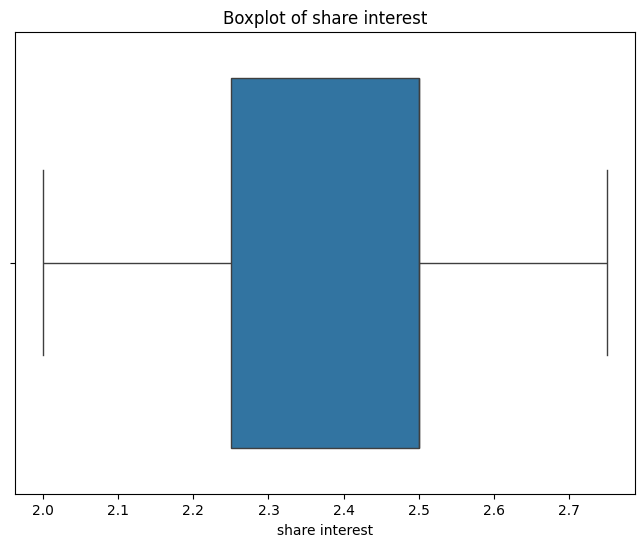


Summary Statistics for share interest:
count    12.000000
mean      2.375000
std       0.226134
min       2.000000
25%       2.250000
50%       2.500000
75%       2.500000
max       2.750000
Name: share interest, dtype: float64

Outliers for share interest:
Empty DataFrame
Columns: [month, share interest, unemployment index, share price]
Index: []


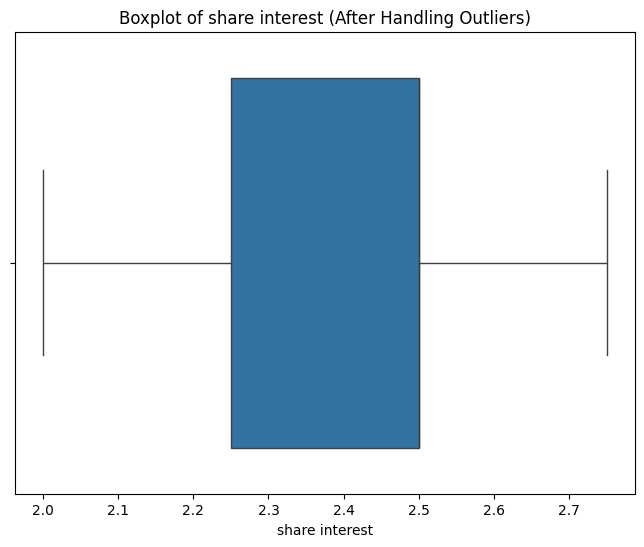

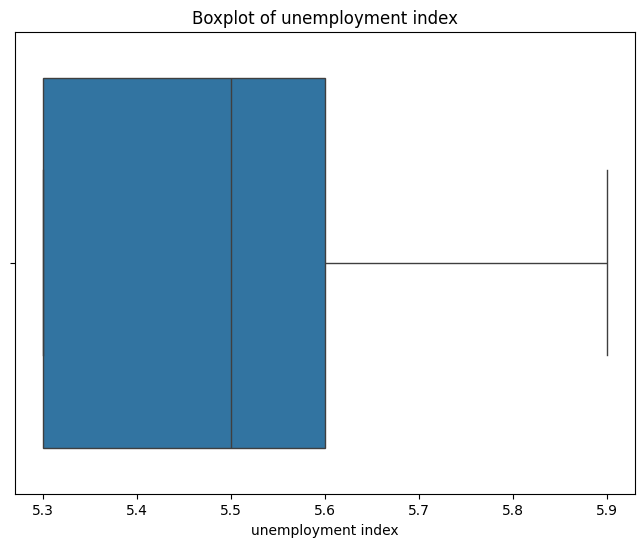


Summary Statistics for unemployment index:
count    12.000000
mean      5.491667
std       0.188092
min       5.300000
25%       5.300000
50%       5.500000
75%       5.600000
max       5.900000
Name: unemployment index, dtype: float64

Outliers for unemployment index:
Empty DataFrame
Columns: [month, share interest, unemployment index, share price]
Index: []


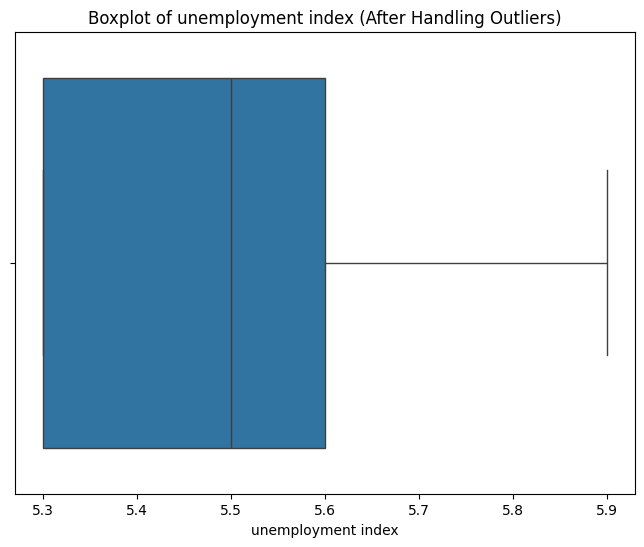

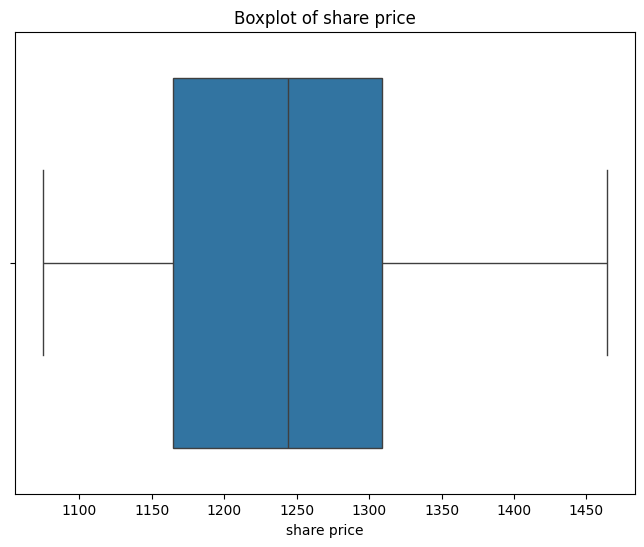


Summary Statistics for share price:
count      12.000000
mean     1248.166667
std       114.144114
min      1075.000000
25%      1165.000000
50%      1244.000000
75%      1309.000000
max      1464.000000
Name: share price, dtype: float64

Outliers for share price:
Empty DataFrame
Columns: [month, share interest, unemployment index, share price]
Index: []


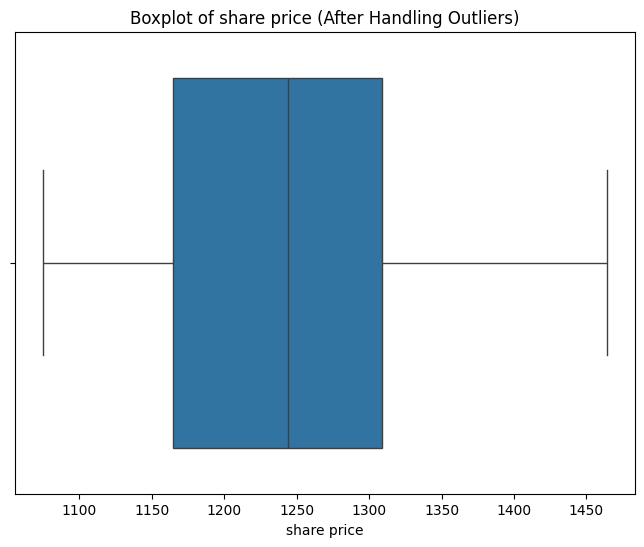

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)

print(df.head())

for col in df.columns[1:]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(f'{col}')
    plt.show()

    summary_stats = df[col].describe()
    print(f"\nSummary Statistics for {col}:")
    print(summary_stats)

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers for {col}:")
    print(outliers)

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (After Handling Outliers)')
    plt.xlabel(f'{col}')
    plt.show()


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
print("\nData Types:")
print(df.dtypes)
print(df.isnull().sum())



Data Types:
month                   int64
share interest        float64
unemployment index    float64
share price             int64
dtype: object
month                 0
share interest        0
unemployment index    0
share price           0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 2431.779071062551
Coefficients: [-570.82089552]
Intercept: 4372.283582089555


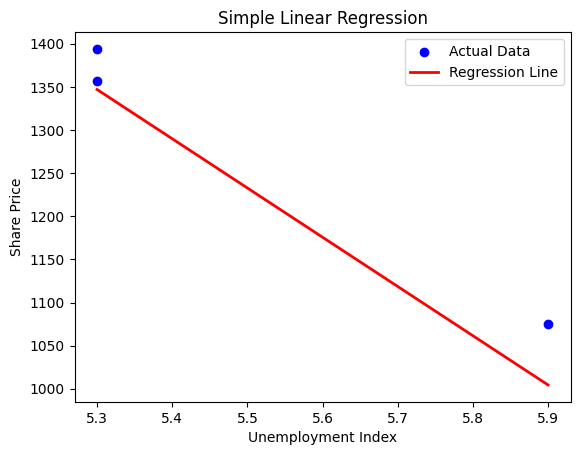

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression')
plt.xlabel('Unemployment Index')
plt.ylabel('Share Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['share interest', 'unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 3888.2233994207763
Coefficients: [ 343.2        -141.82089552]
Intercept: 1197.6835820895535


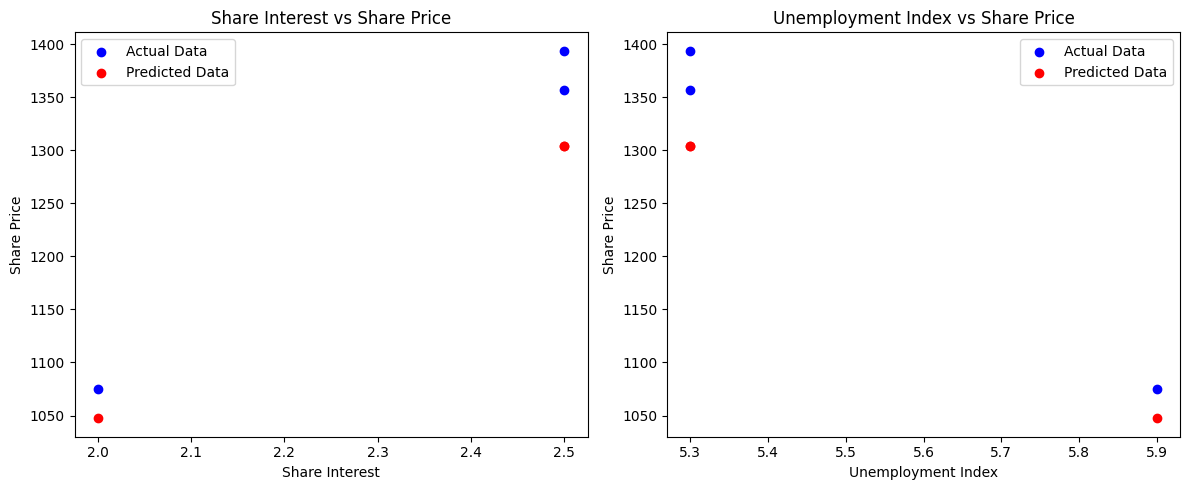

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['share interest', 'unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].scatter(X_test['share interest'], y_test, color='blue', label='Actual Data')
axs[0].scatter(X_test['share interest'], y_pred, color='red', label='Predicted Data')
axs[0].set_title('Share Interest vs Share Price')
axs[0].set_xlabel('Share Interest')
axs[0].set_ylabel('Share Price')
axs[0].legend()
axs[1].scatter(X_test['unemployment index'], y_test, color='blue', label='Actual Data')
axs[1].scatter(X_test['unemployment index'], y_pred, color='red', label='Predicted Data')
axs[1].set_title('Unemployment Index vs Share Price')
axs[1].set_xlabel('Unemployment Index')
axs[1].set_ylabel('Share Price')
axs[1].legend()

plt.tight_layout()
plt.show()


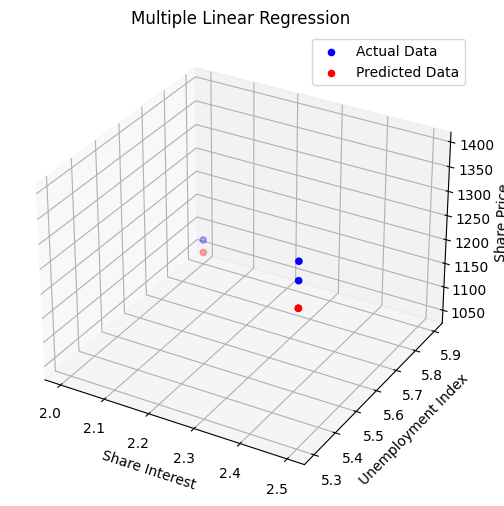

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['share interest', 'unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test['share interest'], X_test['unemployment index'], y_test, color='blue', label='Actual Data')
ax.scatter(X_test['share interest'], X_test['unemployment index'], y_pred, color='red', label='Predicted Data')
ax.set_xlabel('Share Interest')
ax.set_ylabel('Unemployment Index')
ax.set_zlabel('Share Price')
ax.set_title('Multiple Linear Regression')
ax.legend()
plt.show()


Mean Squared Error: 1302418.4097762827
Intercept: -66880652.65679116
Coefficients: [        0.          49087958.22795615 -13504894.97105027
   1650625.14794553    -75625.00672045]


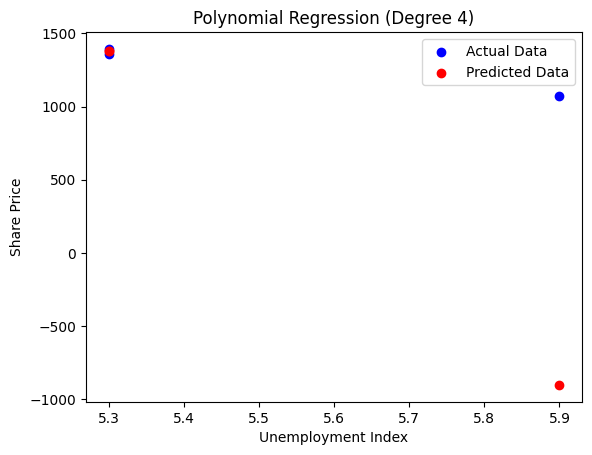

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['unemployment index']].values
y = df['share price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
model = LinearRegression()
model.fit(X_poly_train, y_train)
y_pred = model.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.title('Polynomial Regression (Degree ' + str(degree) + ')')
plt.xlabel('Unemployment Index')
plt.ylabel('Share Price')
plt.legend()
plt.show()


Mean Squared Error: 1302418.4097762827


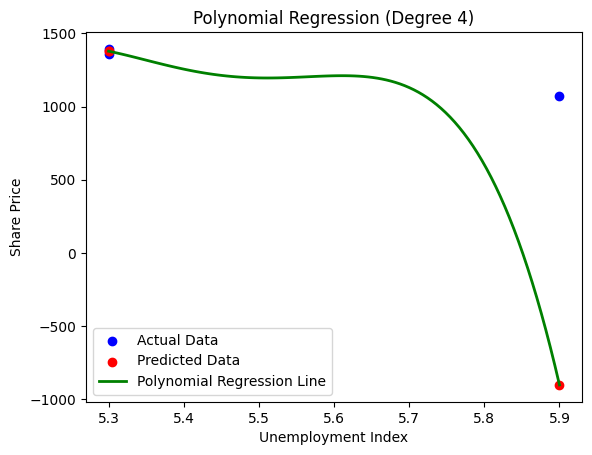

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['unemployment index']].values
y = df['share price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
degree = 4
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)
model = LinearRegression()
model.fit(X_poly_train, y_train)
y_pred = model.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.title('Polynomial Regression (Degree ' + str(degree) + ')')
plt.xlabel('Unemployment Index')
plt.ylabel('Share Price')
plt.legend()
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)
y_range_pred = model.predict(X_range_poly)
plt.plot(X_range, y_range_pred, color='green', linewidth=2, label='Polynomial Regression Line')
plt.legend()
plt.show()


Accuracy: 0.3333333333333333
Confusion Matrix:
[[1 0]
 [2 0]]


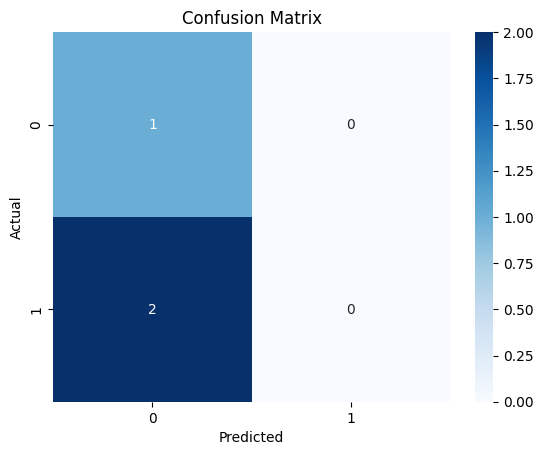

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
threshold = df['share price'].median()
df['target'] = (df['share price'] > threshold).astype(int)
X = df[['unemployment index']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


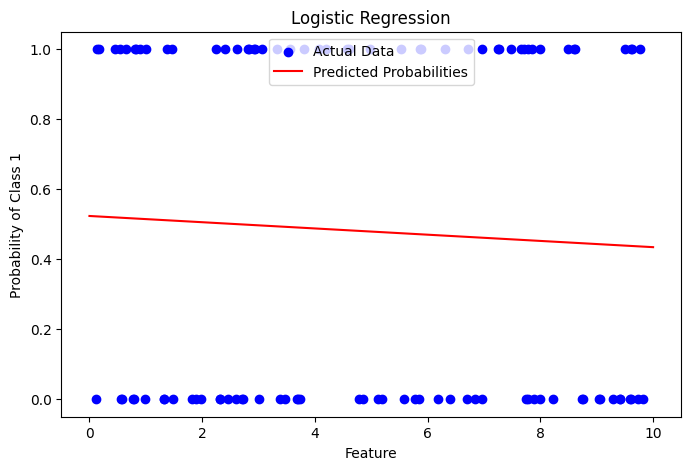

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
X = np.random.rand(100, 1) * 10
y = np.random.randint(0, 2, size=100)
model = LogisticRegression()
model.fit(X, y)
X_values = np.linspace(0, 10, 1000).reshape(-1, 1)
probabilities = model.predict_proba(X_values)[:, 1]
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_values, probabilities, color='red', label='Predicted Probabilities')
plt.xlabel('Feature')
plt.ylabel('Probability of Class 1')
plt.title('Logistic Regression')
plt.legend()
plt.show()


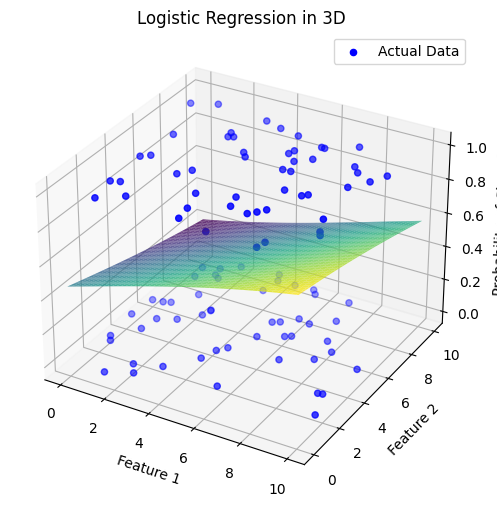

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
np.random.seed(0)
X1 = np.random.rand(100) * 10
X2 = np.random.rand(100) * 10
y = np.random.randint(0, 2, size=100)
X = np.column_stack((X1, X2))
model = LogisticRegression()
model.fit(X, y)
x1_values = np.linspace(0, 10, 100)
x2_values = np.linspace(0, 10, 100)
x1_mesh, x2_mesh = np.meshgrid(x1_values, x2_values)
X_mesh = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))
probabilities = model.predict_proba(X_mesh)[:, 1].reshape(x1_mesh.shape)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Actual Data')
ax.plot_surface(x1_mesh, x2_mesh, probabilities, cmap='viridis', alpha=0.8)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Probability of Class 1')
ax.set_title('Logistic Regression in 3D')
plt.legend()
plt.show()


Mean Squared Error: 2952.513671166668
Feature Importances: [1.]


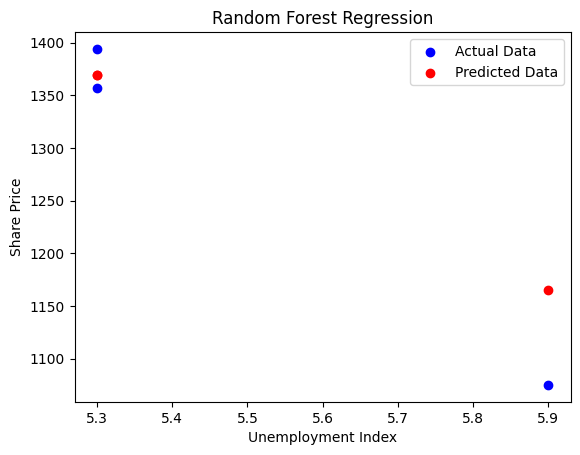

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
feature_importances = model.feature_importances_
print("Feature Importances:", feature_importances)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.title('Random Forest Regression')
plt.xlabel('Unemployment Index')
plt.ylabel('Share Price')
plt.legend()
plt.show()


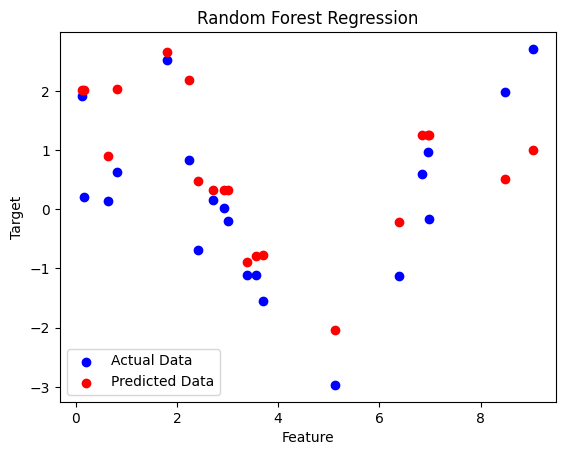

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = np.random.rand(100, 1) * 10
y = 2 * np.sin(X).ravel() + np.random.randn(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.title('Random Forest Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


Mean Squared Error: 16177.089677901682


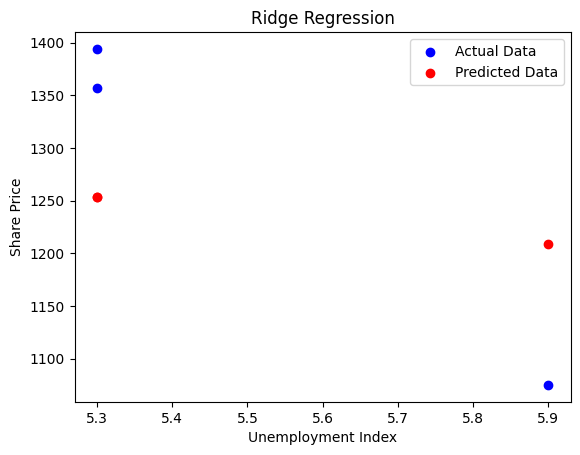

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha = 1.0
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.title('Ridge Regression')
plt.xlabel('Unemployment Index')
plt.ylabel('Share Price')
plt.legend()
plt.show()


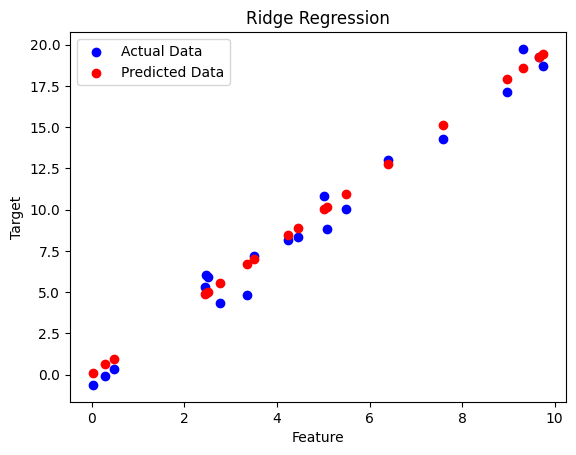

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X = np.random.rand(100, 1) * 10
y = 2 * X.ravel() + np.random.randn(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha = 1.0
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.title('Ridge Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


Mean Squared Error: 1990.4736578302388


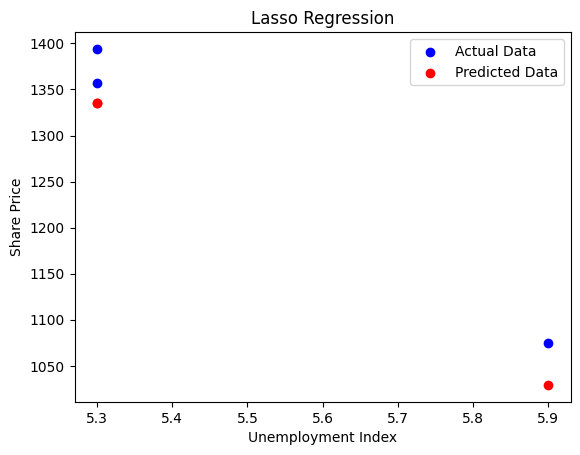

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['unemployment index']]
y = df['share price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha = 1.0
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.title('Lasso Regression')
plt.xlabel('Unemployment Index')
plt.ylabel('Share Price')
plt.legend()
plt.show()


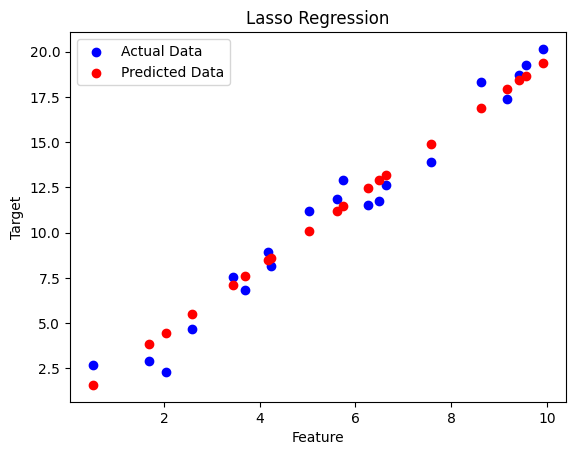

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X = np.random.rand(100, 1) * 10
y = 2 * X.ravel() + np.random.randn(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha = 1.0
model = Lasso(alpha=alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')
plt.title('Lasso Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['unemployment index']].values
y = df['share price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
performance = {}
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)
performance['Linear Regression'] = {'MSE': lr_mse, 'R2': lr_r2, 'RMSE': lr_rmse, 'MAE': lr_mae}
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)
performance['Random Forest Regression'] = {'MSE': rf_mse, 'R2': rf_r2, 'RMSE': rf_rmse, 'MAE': rf_mae}
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
performance['Ridge Regression'] = {'MSE': ridge_mse, 'R2': ridge_r2, 'RMSE': ridge_rmse, 'MAE': ridge_mae}
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
performance['Lasso Regression'] = {'MSE': lasso_mse, 'R2': lasso_r2, 'RMSE': lasso_rmse, 'MAE': lasso_mae}
print("Performance Metrics:")
for model, metrics in performance.items():
    print(model)
    print("MSE:", metrics['MSE'])
    print("R2:", metrics['R2'])
    print("RMSE:", metrics['RMSE'])
    print("MAE:", metrics['MAE'])
    print()


Performance Metrics:
Linear Regression
MSE: 2431.779071062551
R2: 0.8801777588250849
RMSE: 49.31307200999093
MAE: 42.56467661691477

Random Forest Regression
MSE: 2952.513671166668
R2: 0.8545193478352513
RMSE: 54.337037747439524
MAE: 42.30100000000001

Ridge Regression
MSE: 16177.089677901682
R2: 0.20289833728735684
RMSE: 127.1891885259973
MAE: 126.17698259187614

Lasso Regression
MSE: 1990.4736578302388
R2: 0.9019224165883466
RMSE: 44.6147246750469
MAE: 41.89303482587047



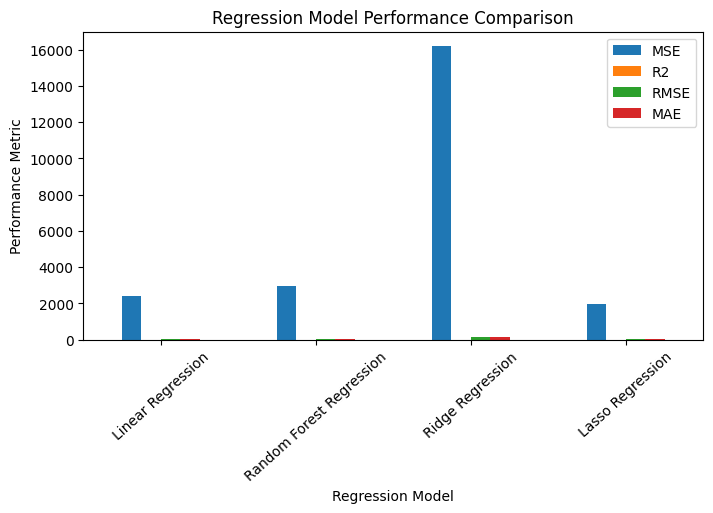

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
url = "https://raw.githubusercontent.com/Oluwills/Health-Care-Data-Sample/main/Health%20Care%20Data%20Sample.csv"
df = pd.read_csv(url)
X = df[['unemployment index']].values
y = df['share price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
performance = {}
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, lr_pred)
performance['Linear Regression'] = {'MSE': lr_mse, 'R2': lr_r2, 'RMSE': lr_rmse, 'MAE': lr_mae}
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)
performance['Random Forest Regression'] = {'MSE': rf_mse, 'R2': rf_r2, 'RMSE': rf_rmse, 'MAE': rf_mae}
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
performance['Ridge Regression'] = {'MSE': ridge_mse, 'R2': ridge_r2, 'RMSE': ridge_rmse, 'MAE': ridge_mae}
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
performance['Lasso Regression'] = {'MSE': lasso_mse, 'R2': lasso_r2, 'RMSE': lasso_rmse, 'MAE': lasso_mae}
performance_df = pd.DataFrame.from_dict(performance, orient='index')
performance_df.plot(kind='bar', figsize=(8, 4))
plt.title('Regression Model Performance Comparison')
plt.xlabel('Regression Model')
plt.ylabel('Performance Metric')
plt.xticks(rotation=42)
plt.legend(loc='upper right')
plt.show()


In [41]:
print("Performance Metrics:")
for model, metrics in performance.items():
    print(model)
    print("MSE:", metrics['MSE'])
    print("R2:", metrics['R2'])
    print("RMSE:", metrics['RMSE'])
    print("MAE:", metrics['MAE'])
    print()
best_model = min(performance, key=lambda x: performance[x]['MSE'])
print("Best Model (based on MSE):", best_model)


Performance Metrics:
Linear Regression
MSE: 2431.779071062551
R2: 0.8801777588250849
RMSE: 49.31307200999093
MAE: 42.56467661691477

Random Forest Regression
MSE: 2952.513671166668
R2: 0.8545193478352513
RMSE: 54.337037747439524
MAE: 42.30100000000001

Ridge Regression
MSE: 16177.089677901682
R2: 0.20289833728735684
RMSE: 127.1891885259973
MAE: 126.17698259187614

Lasso Regression
MSE: 1990.4736578302388
R2: 0.9019224165883466
RMSE: 44.6147246750469
MAE: 41.89303482587047

Best Model (based on MSE): Lasso Regression
